In [1]:
import pandas as pd
from utilidades_graficas import *

In [2]:
archivo_resultados_float = pd.read_excel('out_float.xlsx')
archivo_resultados_float.platform.replace(['cuda', 'numpy', 'opencl'], 
                                          ['cuda_float', 'numpy_float', 'opencl_float'], inplace=True)
archivo_resultados_float.head()

,platform,method,size,iterations,time,accuracy,dispersion
0,cuda_float,jacobi,1000,7,0.219970,2.075463e-07,3.030201e-08
1,cuda_float,GD,1000,14,0.425503,5.361632e-07,9.545659e-08
2,cuda_float,CG,1000,8,0.231552,5.430368e-07,7.755828e-08
3,opencl_float,jacobi,1000,7,0.024145,2.095472e-07,3.621305e-08
4,opencl_float,GD,1000,14,0.095548,5.385834e-07,9.757399e-08


In [3]:
archivo_resultados_double = pd.read_excel('out_double.xlsx')
archivo_resultados_double.platform.replace(['cuda', 'numpy', 'opencl'], 
                                          ['cuda_double', 'numpy_double', 'opencl_double'], inplace=True)
archivo_resultados_double.head()

,platform,method,size,iterations,time,accuracy,dispersion
0,cuda_double,jacobi,500,15,0.369718,3.846334e-16,8.110625e-16
1,cuda_double,GD,500,24,0.838247,1.256322e-15,3.965990e-15
2,cuda_double,CG,500,19,0.678831,7.058809e-16,2.698037e-15
3,numpy_double,jacobi,500,13,0.005186,3.990006e-16,1.763165e-15
4,numpy_double,GD,500,21,0.002247,7.260754e-16,2.419640e-15


In [4]:
archivo_resultados = archivo_resultados_float.append(archivo_resultados_double, ignore_index=True)
archivo_resultados.head()

,platform,method,size,iterations,time,accuracy,dispersion
0,cuda_float,jacobi,1000,7,0.219970,2.075463e-07,3.030201e-08
1,cuda_float,GD,1000,14,0.425503,5.361632e-07,9.545659e-08
2,cuda_float,CG,1000,8,0.231552,5.430368e-07,7.755828e-08
3,opencl_float,jacobi,1000,7,0.024145,2.095472e-07,3.621305e-08
4,opencl_float,GD,1000,14,0.095548,5.385834e-07,9.757399e-08


In [5]:
plataformas = archivo_resultados['platform'].unique()
metodos = archivo_resultados['method'].unique()
tamaños = archivo_resultados['size'].unique()
columnas = ['plataforma', 'metodo', 'tamaño', 'iteraciones_promedio', 'std_iteraciones',
            'tiempo_promedio', 'std_tiempo', 'precision_promedio', 'std_precision', 
            'dispersion_promedio', 'std_dispersion']
resultados = pd.DataFrame(columns=columnas)

for plataforma in plataformas:
    for metodo in metodos:
        for tamaño in tamaños:
            tabla = archivo_resultados.loc[archivo_resultados['platform'] == plataforma]
            tabla = tabla.loc[tabla['method'] == metodo]
            tabla = tabla.loc[tabla['size'] == tamaño]
            descripcion_iteraciones = describir(tabla['iterations'])
            descripcion_tiempo = describir(tabla['time'])
            descripcion_error = describir(tabla['accuracy'])
            descripcion_dispersion = describir(tabla['dispersion'])
            
            valores_fila = [[plataforma, metodo, tamaño] + descripcion_iteraciones +
                            descripcion_tiempo + descripcion_error + descripcion_dispersion]
            fila = pd.DataFrame(valores_fila, columns=columnas)
            resultados = resultados.append(fila, ignore_index=True)
            
resultados.head()

,plataforma,metodo,tamaño,iteraciones_promedio,std_iteraciones,tiempo_promedio,std_tiempo,precision_promedio,std_precision,dispersion_promedio,std_dispersion
0,cuda_float,jacobi,1000,7.0,0.0,0.140769,0.046556,2.086221e-07,1.169794e-08,3.105916e-08,2.253976e-09
1,cuda_float,jacobi,1500,6.0,0.0,0.131396,0.033854,2.501676e-07,5.619866e-09,6.873763e-08,3.656508e-09
2,cuda_float,jacobi,2000,6.0,0.0,0.119326,0.008857,2.858243e-07,9.062708e-09,5.059932e-08,1.558560e-09
3,cuda_float,jacobi,2500,6.0,0.0,0.146110,0.014810,3.188801e-07,9.717555e-09,3.883686e-08,1.783914e-09
4,cuda_float,jacobi,3000,6.0,0.0,0.161950,0.041775,3.594560e-07,1.120214e-08,3.410093e-08,7.068691e-10


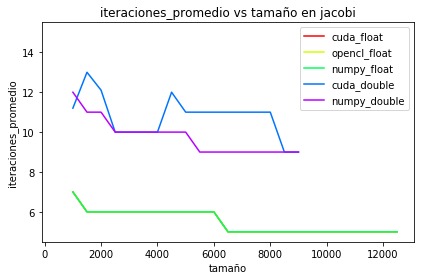

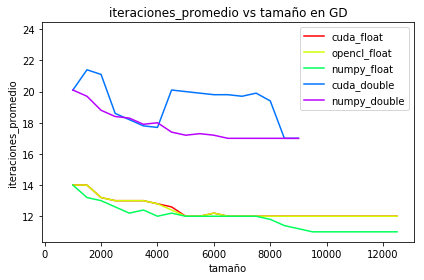

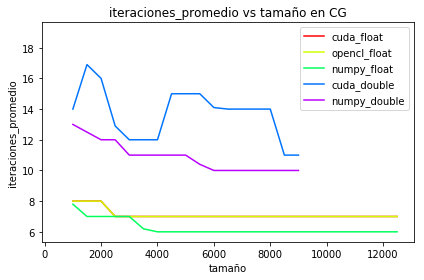

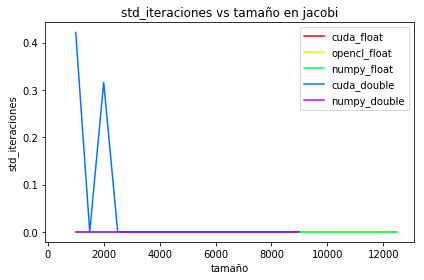

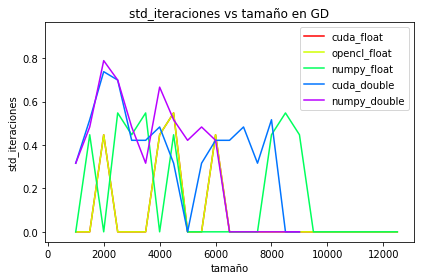

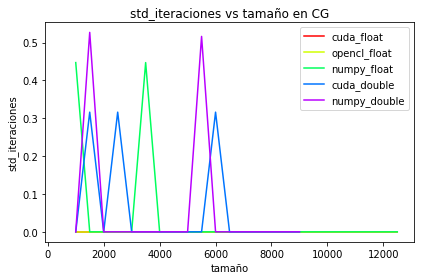

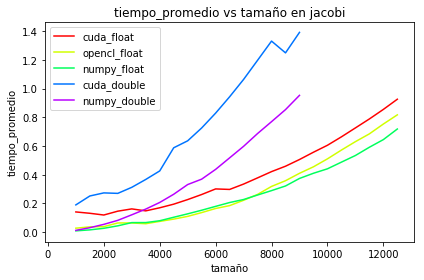

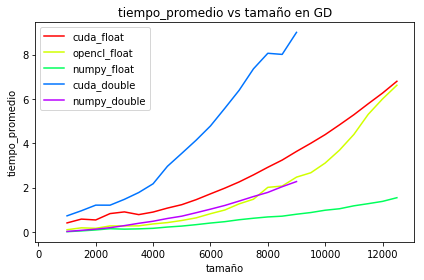

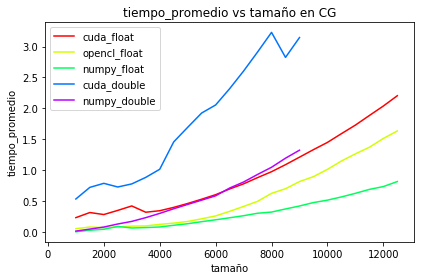

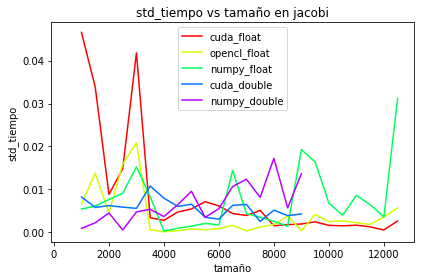

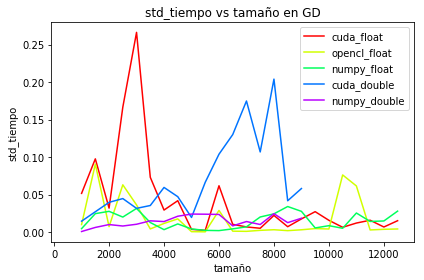

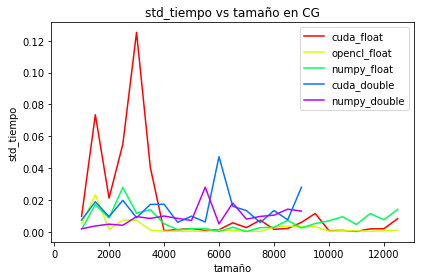

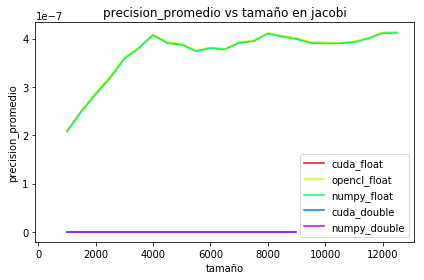

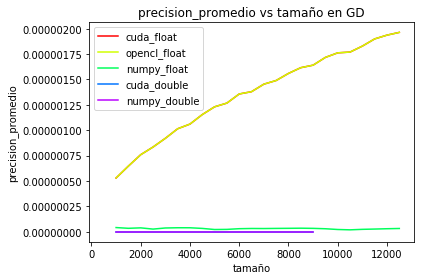

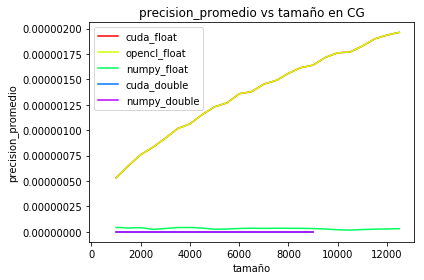

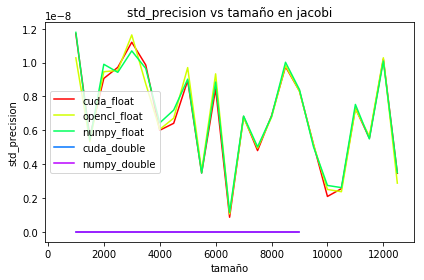

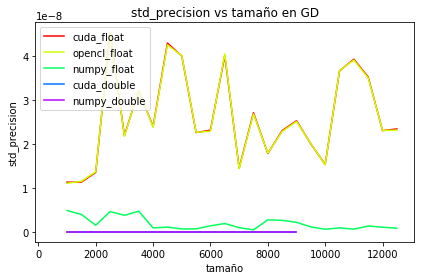

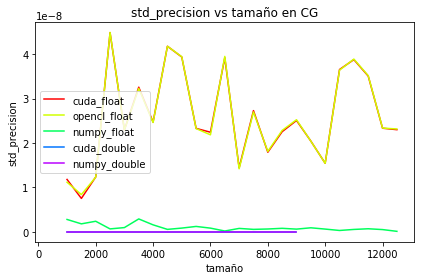

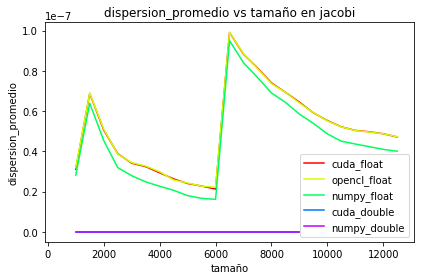

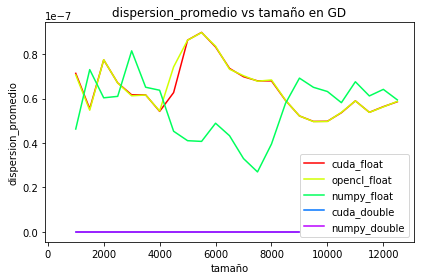

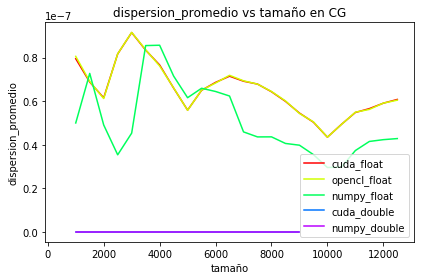

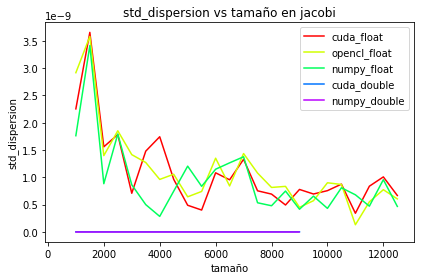

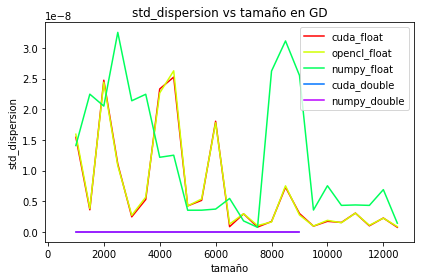

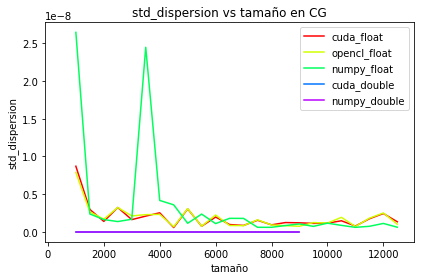

In [6]:
ys = columnas[3:]
for y in ys:
    for metodo in metodos:
        graficar(resultados, metodo=metodo, x='tamaño', y=y, plataformas=plataformas)